# SciPy - Library of scientific algorithms for Python

## 1. 简介

SciPy框架建立在用于多维数组的低级NumPy框架之上，并提供了大量的高级科学算法。

![cover](images/scipy.png)

SciPy涵盖的一些主题是:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

这些子模块中的每一个都提供了许多可用于解决各自主题中的问题的函数和类。

为了在Python程序中获得这些SciPy程序包，我们首先从调用`scipy`模块开始。

In [ ]:
# 这一行的作用会在第四节讲到
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

如果只使用SciPy框架的一部分，可以选择性地包含那些我们感兴趣的模块。例如，为了将线性代数包包含在`la`名词下，可以这样做：

In [3]:
import scipy.linalg as la



## 2. 特殊功能

有很多数学的特殊函数对于很多计算物理问题都很重要。SciPy提供了一组非常广泛的特殊函数的实现。有关具体的细节，参见参考文档中的函数列表 http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

为了演示特殊函数的典型用法我们将会将会更多的讲到贝塞尔函数的细节：

In [2]:
# scipy.special模块包含了一系列的贝塞尔函数
# 在这里我们将会运用函数jn和yn，它们是第一类和第二类实值阶的贝塞尔函数。 
# 我们同样包含了函数jn_zeros和yn_zeros，它们给出了函数jn和yn的零点
#
from scipy.special import jn, yn, jn_zeros, yn_zeros
import numpy as np

In [3]:
n = 0    # order
x = 0.0

# 第一类贝塞尔函数
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# 第二类贝塞尔函数
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


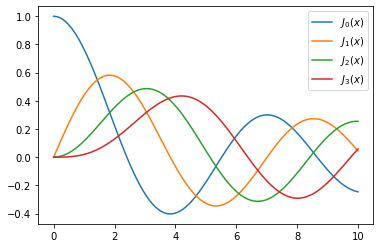

In [10]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [4]:
# 贝塞尔函数的零点
n = 0 # 阶数
m = 4 # 需要计算的根的数量
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## 3. 积分

### 3.1 数值积分：求积

该类型函数的数值计算

$\displaystyle \int_a^b f(x) dx$

被称做*数值求积*,或者简单的讲*求积*。SciPy为不同形式的求积提供了一系列的函数，例如`quad`, `dblquad`和`tplquad`分别针对单，二重，三重积分。


In [5]:
from scipy.integrate import quad, dblquad, tplquad

`quad` 函数提供了很多的可选参数，这可以被用作调整函数的行为（尝试用`help(quad)`来查看更多细节）

常用的方法如下：

In [6]:
# 定义一个简单的被积函数
def f(x):
    return x

In [7]:
x_lower = 0 # x的下限
x_upper = 1 # x的上限

val, abserr = quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr)

integral value = 0.5 , absolute error = 5.551115123125783e-15


如果我们需要去传递额外的参数到被积函数中我们可以用`args`关键字参数：

In [8]:
def integrand(x, n):
    """
    一阶n的贝塞尔函数
    """
    return jn(n, x)


x_lower = 0  # x的下限
x_upper = 10 # x的上限

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(val, abserr)

0.7366751370811073 9.389126882496403e-13


对于简单的函数，我们可以使用lambda函数(没有名称的函数)而不是显式地为被积函数定义函数:

In [9]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -Inf, Inf)

print("numerical  =", val, abserr)

analytical = np.sqrt(pi)
print("analytical =", analytical)

NameError: name 'Inf' is not defined

正如下面的例子所示，我们也可以用'Inf'和'-Inf'作为积分限制

高维积分的工作方式相同:

In [10]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

0.7853981633974476 1.3753098510218528e-08


注意我们是如何通过函数来求y积分的极限的，因为这些可以是关于x的函数。

## 4. 常微分方程 (ODEs)

SciPy提供了两个不同的方式去求解ODE方程：一个基于方程`odeint`的API和面向对象的API基于类`ode`。

通常`odeint`更容易上手，但是`ode`类提供了一些更好级别的控制。

在这里我们将会用`odeint`方程。对于更多关于`ode`类的信息，尝试`help(ode)`。它和`odeint`所做的事情基本相同，但是以面向对象的方式。

为了使用`odeint`，首先从`scipy.integrate`模块中导入它。

In [17]:
from scipy.integrate import odeint, ode

常微分方程系统通常在受到数值攻击之前以标准形式形成。标准的形式是：

$y' = f(y, t)$

在这里

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

而且$f$是一些给出方程$y_i(t)$导数的方程。为了求解一个常微分方程我们需要知道方程$f$和一个初始条件$y(0)$。

注意，通过为中间导数引入新的变量，高阶ode总是可以写成这种形式。

一旦我们定义了Python函数`f`和数组`y_0`（也就是$f$和$y(0)$的数学表示），我们可以这样运用`odeint`函数：

    y_t = odeint(f, y_0, t)

在这里`t`是一个具有时间坐标的数组，用来解决偏微分问题。`y_t`是仅有一行的数组对于每一个点在时间`t`，每一列对应于在那个时间点上的解`y_i(t)`。

我们将会在下面的例子中看到如何将`f`和`y_0`应用在我们的Python代码中。


#### 例子：双摆

我们来考虑一个物理问题：双摆问题，具体的描述如下：http://en.wikipedia.org/wiki/Double_pendulum

In [11]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

在维基上给出的双摆运动方程如下：

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

为了让Python代码更加简单容易理解，我们建立新的变量名字和向量标记： $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [19]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    双摆常微分方程的右侧
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [20]:
# 选择一个初始状态
x0 = [np.pi/4, np.pi/2, 0, 0]

In [21]:
# 解决常微分方程的坐标：从0到10秒
t = np.linspace(0, 10, 250)

In [22]:
# 解决常微分方程
x = odeint(dx, x0, t)

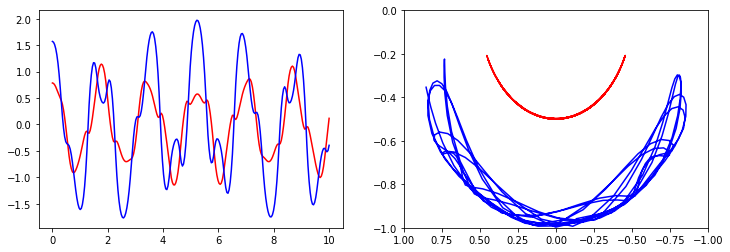

In [24]:
# 把角度作为时间的函数画出来

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

简单的双摆运动模拟动画，我们将在第四节课看到如何制作更好的动画

In [25]:
from IPython.display import display, clear_output
import time

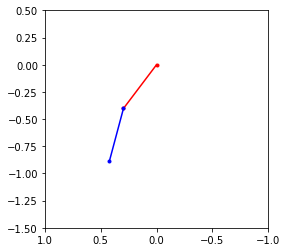

KeyboardInterrupt: 

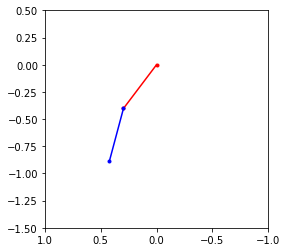

In [27]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * np.sin(x[t_idx, 0])
    y1 = - L * np.cos(x[t_idx, 0])

    x2 = x1 + L * np.sin(x[t_idx, 1])
    y2 = y1 - L * np.cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(0.1)

#### 例子：阻尼谐振子

常微分方程在计算物理中是非常重要的，因此我们将会再看一个例子：阻尼谐振子。这个问题在wiki网页被有着很好的介绍：http://en.wikipedia.org/wiki/Damping

阻尼谐振子的运动方程是：

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

在这里$x$是振荡器的位置， $\omega_0$是频率，而且$\zeta$是阻尼系数。为了以我们介绍的标准形式写这个二阶常微分方程$p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

在这个例子的应用中我们将为ODE的RHS方程添加额外的参数，而不是像我们在之前的例子中使用的全局变量。作为额外参数到RHS的结果，我们需要传递一个关键字参数`args`到`odeint`函数:

In [30]:
def dy(y, t, zeta, w0):
    """
    阻尼谐振子方程的右侧
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [31]:
# 初始状态: 
y0 = [1.0, 0.0]

In [33]:
# 为了求解常微分方程的时间坐标
t = np.linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [34]:
# 求解阻尼比的三个不同值的ODE问题

y1 = odeint(dy, y0, t, args=(0.0, w0)) # 零阻尼
y2 = odeint(dy, y0, t, args=(0.2, w0)) # 欠阻尼
y3 = odeint(dy, y0, t, args=(1.0, w0)) # 临界阻尼
y4 = odeint(dy, y0, t, args=(5.0, w0)) # 过阻尼

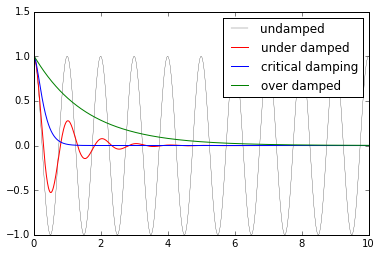

In [27]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

## 5. 傅立叶转换

傅里叶变换是计算物理中的通用工具之一，它在不同的环境中反复出现。SciPy提供了从NetLib访问经典库[FFTPACK](http://www.netlib.org/fftpack/)的函数，NetLib是用FORTRAN编写的高效且经过良好测试的FFT库。SciPy的API有一些额外的便利函数，但是总的来说API是接近于原来的FORTRAN函数库的。

为了在python程序中使用`fftpack`模块，我们需要这样包含它：

In [35]:
from numpy.fft import fftfreq
from scipy.fftpack import *

为了演示如何用SciPy进行快速傅立叶变换，我们先看以前章节中阻尼谐振子的傅立叶变换结果：

In [36]:
N = len(t)
dt = t[1]-t[0]

# 计算快速傅立叶变换
# y2是以前章节中欠阻尼谐阵子中的解
F = fft(y2[:,0]) 

# 计算F中组成的频率
w = fftfreq(N, dt)

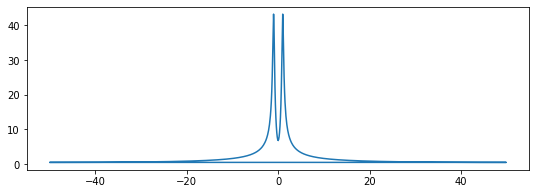

In [37]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

因为信号是在真实的，所以频谱是对称的。我们因此仅仅需要正频率。为了提取`w`和`F`的部分，我们可以用一些我们在第二节课看到的NumPy索引技巧。

In [31]:
indices = where(w > 0) # 仅仅选取对应正频率的元素索引
w_pos = w[indices]
F_pos = F[indices]

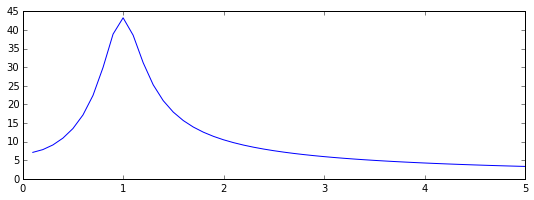

In [32]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

和预期的一样，我们现在在频谱图上看到峰值中心在1左右，这也是我们在阻尼谐振子例子中的频率。

## 6. 线性代数

线性代数模块包含了许多矩阵相关的函数，包括线性函数求解，特征值，矩阵方程（例如矩阵求幂）和许多不同的分解（SVD，LU，cholesky)等。

详细的教程可以在这里找到：http://docs.scipy.org/doc/scipy/reference/linalg.html

在这里我们将会看到如何去用这些函数：

### 6.1 线性代数系统

矩阵形式的线性代数系统

$A x = b$

在这里$A$是一个矩阵而$x,b$是向量，可以以这样的方式来解决：

In [28]:
from scipy.linalg import *
import numpy as np

In [29]:
A = np.array([[1,2], [4,5]])
b = np.array([1,2])

In [30]:
x = solve(A, b)

x

array([-0.33333333,  0.66666667])

In [31]:
# 检查
np.dot(A, x) - b

array([0., 0.])

我们也可以这样来做

$A X = B$

在这里$A, B, X$是矩阵:

In [37]:
A = rand(3,3)
B = rand(3,3)

In [38]:
X = solve(A, B)

In [39]:
X

array([[ 1.19168749,  1.34543171,  0.38437594],
       [-0.88153715, -3.22735597,  0.66370273],
       [ 0.10044006,  1.0465058 ,  0.39801748]])

In [40]:
# 检查
norm(dot(A, X) - B)

2.0014830212433605e-16

### 6.2 特征值和特征向量

矩阵$A$的特征值问题：

$\displaystyle A v_n = \lambda_n v_n$

在这里$v_n$是第$n$个特征向量而$\lambda_n$是第$n$个特征值。

为了计算矩阵的特征值，用`eigvals`。而对于计算特征值和特征向量，用函数`eig`：

In [32]:
evals = eigvals(A)

In [33]:
evals

array([-0.46410162+0.j,  6.46410162+0.j])

In [34]:
evals, evecs = eig(A)

In [8]:
evals

array([-0.46410162+0.j,  6.46410162+0.j])

In [35]:
evecs

array([[-0.80689822, -0.34372377],
       [ 0.59069049, -0.9390708 ]])

特征向量对应着第$n$个特征值（以`evals[n]`的形式存储）是`evecs`的第$n$列，例如`evecs[:,n]`。为了验证这个，我们一起尝试去用特征向量乘以矩阵A并与特征向量和特征值的乘积的对比：

In [46]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

3.243515426387745e-16

也有一些更专业的特征求解器，例如用于Hermitian矩阵的`eigh`。 

### 6.3 矩阵操作

In [10]:
# 矩阵求逆
inv(A)

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

In [11]:
# 行列式
det(A)

-3.0

In [49]:
# 不同阶的范数
norm(A, ord=2), norm(A, ord=Inf)

(1.3060382297688262, 1.591998214728641)

### 6.4 稀疏矩阵

如果问题可以用矩阵形式描述，其中矩阵或向量大多包含0，那么稀疏矩阵在处理大型系统的数值模拟中通常是有用的。Scipy对稀疏矩阵有很好的支持，可以进行基本的线性代数运算(比如方程求解、特征值计算等)。

有许多可能的策略去有效地存储稀疏矩阵。最常见的是所谓的坐标形式(COO)、列表的列表形式(LIL)和压缩稀疏列CSC(和行，CSR)。每种格式都有一些优点和缺点。大多数计算算法(方程求解、矩阵-矩阵乘法等)可以使用CSR或CSC格式有效地实现，但它们不那么直观，也不那么容易初始化。因此，稀疏矩阵通常最初以COO或LIL格式创建(在这种格式中，我们可以有效地向稀疏矩阵数据添加元素)，然后在实际计算中使用之前转换为CSC或CSR。

更多的关于稀疏格式的信息可以参考http://en.wikipedia.org/wiki/Sparse_matrix

当我们创造一个稀疏矩阵时我们需要去选择他们应该以何种格式来存储。例如：

In [36]:
from scipy.sparse import *

In [37]:
# 稠密矩阵
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [38]:
# 从稠密转向稀疏
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.longlong'>'
	with 6 stored elements in Compressed Sparse Row format>

In [39]:
# 从稀疏转向稠密
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

创建稀疏矩阵更有效的方法：创建一个空的矩阵并用矩阵索引填充（避免创建一个潜在的大型稠密矩阵）

In [43]:
A = lil_matrix((4,4)) # 空的4×4稀疏矩阵
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [44]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

在不同的稀疏矩阵格式中转换：

In [45]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [46]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [47]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

我们可以像计算稠密矩阵那样计算稀疏矩阵：

In [48]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [49]:
(A * A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [61]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [62]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [63]:
v = array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [64]:
# 稀疏矩阵-稠密向量乘法
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [65]:
# 和稠密矩阵一样的结果-稠密向量乘法
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## 7. 优化

优化（找出方程的最大值或最小值）是数学中的一块大的领域，而复杂函数或多变量函数的最优化是相当复杂的。在这里我们将会看一些非常简单的例子。对于有关利用SciPy实现最优化的更详细的内容参考：http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

为了在SciPy中是有最优化模块我们首先需要包含`optimize`模块：

In [40]:
from scipy import optimize

### 7.1 找到最小值

我们先看如何找到简单的单变量方程的最小值。

In [41]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

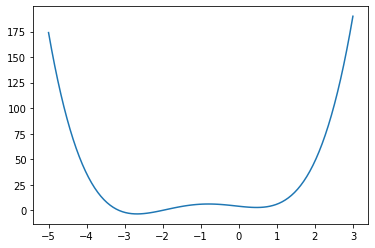

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

我们可以用`fmin_bfgs`函数找到方程的最小值：

In [43]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

In [44]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([0.46961745])

我们也可以用`brent`或`fminbound`函数。他们有一点句法上的不同而且用了不同的算法。

In [71]:
optimize.brent(f)

0.46961743402759754

In [72]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### 7.2 找到一个方程的解

为了找到一个$f(x) = 0$形式的方程的跟，我们可以用`fsolve`方程。它需要一个初始假设：

In [45]:
omega_c = 3.0
def f(omega):
    # 一个先验证方程：一个low-Q SQUID的终止微波共振器的共振频率
    return np.tan(2*np.pi*omega) - omega_c/omega

/home/bushuhui/virtualenv/dl/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


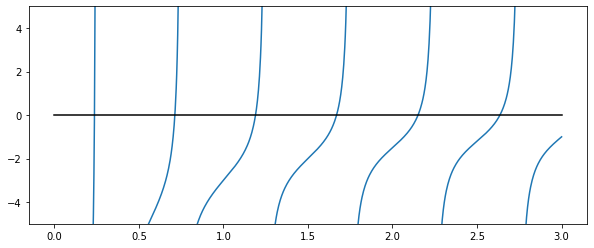

In [54]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN # 当函数翻转符号时去掉竖线
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [33]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [34]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [77]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## 8. 插值

插值在scipy中是简单而方便的：当给定描述X和Y数据的数组时，`interp1d`函数返回的对象就像函数一样，可以调用任意的X值（在X覆盖的区域内），而且他返回的相应的经过插值得到的y。

In [35]:
#FIXME: use as
from scipy.interpolate import *

In [79]:
def f(x):
    return sin(x)

In [80]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # 带噪声模拟测量
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

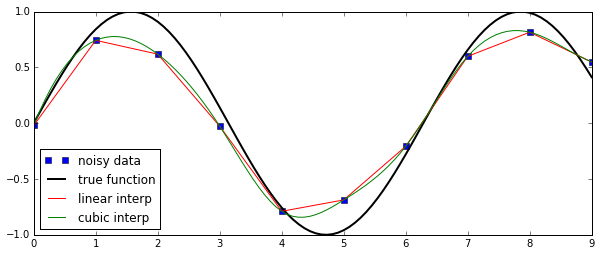

In [81]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## 9. 统计

`scipy.stats`模块包含了许多统计分布，统计函数和测试。对于它完整特征的文档描述可以参考：http://docs.scipy.org/doc/scipy/reference/stats.html.

也有一个对于统计建模同样非常有用的python包叫做statsmodels。参考http://statsmodels.sourceforge.net

In [46]:
from scipy import stats

In [47]:
# 创建一个（离散的）具有泊松分布的随机变量

X = stats.poisson(3.5) # n=3.5光子时相干态的光子分布

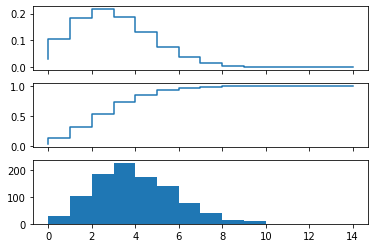

In [49]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# 画出概率密度函数(PMF)
axes[0].step(n, X.pmf(n))

# 画出累积分布函数(CDF)
axes[1].step(n, X.cdf(n))

# 绘制1000个随机变量X的随机实现的直方图
axes[2].hist(X.rvs(size=1000));

In [50]:
# 创建一个（连续的）正态分布的随机变量
Y = stats.norm()

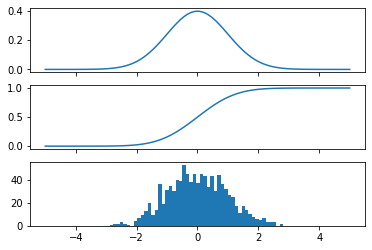

In [52]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# 画出概率密度函数 (PDF)
axes[0].plot(x, Y.pdf(x))

# 画出累积分布函数(CDF)
axes[1].plot(x, Y.cdf(x));

# 绘制随机变量Y的1000个随机实现的直方图
axes[2].hist(Y.rvs(size=1000), bins=50);

统计:

In [87]:
X.mean(), X.std(), X.var() # 泊松分布

(3.5, 1.8708286933869707, 3.5)

In [88]:
Y.mean(), Y.std(), Y.var() # 正态分布

(0.0, 1.0, 1.0)

### 9.1 统计测试

测试是否两组独立的随机变量来自同样的分布：

In [89]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print "t-statistic =", t_statistic
print "p-value =", p_value

t-statistic = -0.901953297251
p-value = 0.367190391714


因为p值非常的大所以我们不能否定两组数据具有*不同的*均值假设。

检验单个样本数据的均值是否为0.1(真实均值为0.0):

In [90]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-3.1644288210071765, pvalue=0.0016008455559249511)

低P值意味着我们可以拒绝Y均值是0.1的假设。

In [91]:
Y.mean()

0.0

In [92]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=2.2098772438652992, pvalue=0.027339807364469011)

## 进一步的阅读

* http://www.scipy.org - SciPy项目官方网站.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - 关于如何开始使用SciPy的教程. 
* https://github.com/scipy/scipy/ - SciPy源码. 